# Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("datasets_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape
data.info()
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Check for Assumption 1- There should be no outliers in the data

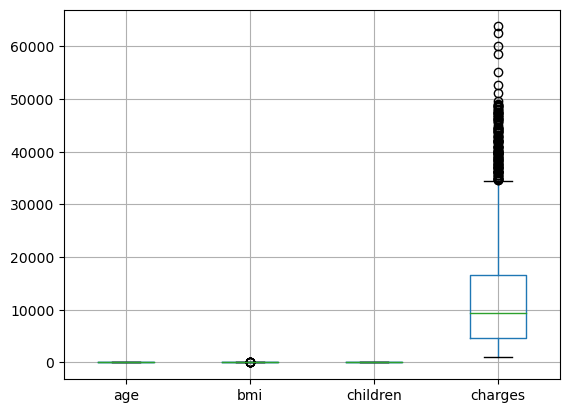

In [6]:
data.boxplot();
plt.show()



logically insurance range can be high

# Check for Assumption 2-Assumption of Linearity

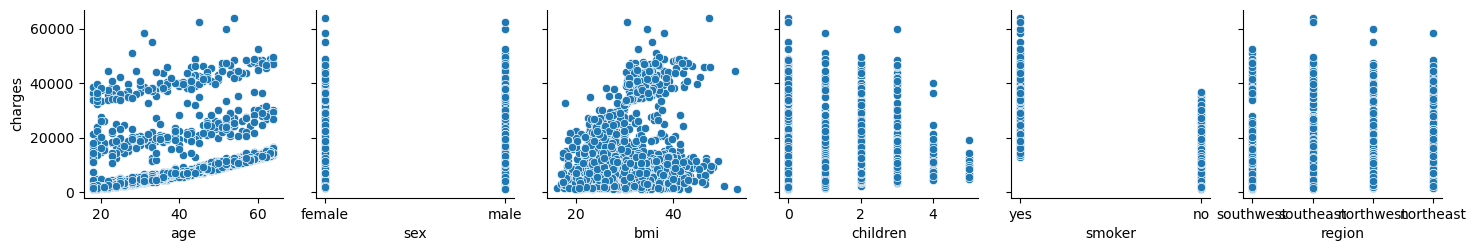

In [7]:
sns.pairplot(data,x_vars=['age','sex','bmi', 'children', 'smoker','region'],
            y_vars=['charges'],kind='scatter')
plt.show()

# label encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

# Create X and Y

In [9]:
X = data.loc[:,['age', 'sex','bmi', 'children', 'smoker','region']]    
Y = data.loc[:,'charges']

# Check for the normality in the X variables.

Hint: Some variables make not look normal but realize that they are actually discrete valued. No transformation required.

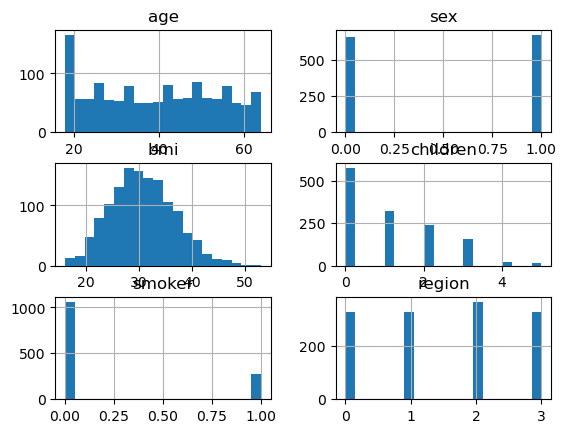

In [10]:
X.hist(bins=20)
plt.show() 

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


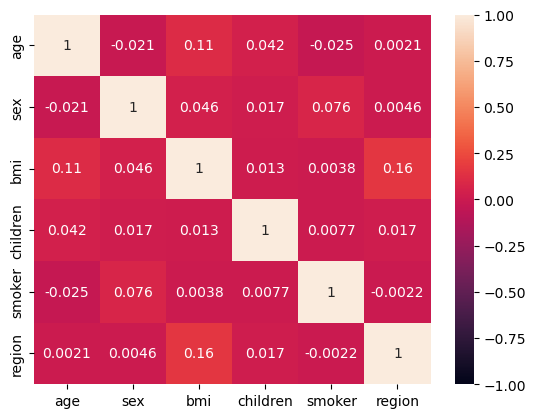

In [11]:
corr_data = X.corr(method='pearson')
print(corr_data)

sns.heatmap(corr_data,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

# Splitting X and Y

In [12]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=42) 

# Applying all the regression algorithm 

In [13]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Uncomment if XGBoost is installed
# from xgboost import XGBRegressor

# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model_performance(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # R-squared
    r2 = r2_score(Y_test, Y_pred)
    print(f"R-squared: {r2:.4f}")
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    print(f"RMSE: {rmse:.4f}")
    
    # Adjusted R-squared
    n = len(Y_test)   # Number of observations
    p = X_test.shape[1]   # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f"Adjusted R-squared: {adjusted_r2:.4f}\n")

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model_performance(model, X_train, X_test, Y_train, Y_test)


Evaluating Linear Regression
R-squared: 0.7833
RMSE: 5799.5871
Adjusted R-squared: 0.7784

Evaluating Decision Tree
R-squared: 0.7471
RMSE: 6265.4429
Adjusted R-squared: 0.7413

Evaluating Random Forest
R-squared: 0.8643
RMSE: 4590.5735
Adjusted R-squared: 0.8611

Evaluating KNN Regressor
R-squared: 0.1445
RMSE: 11524.5237
Adjusted R-squared: 0.1248

Evaluating SVR
R-squared: -0.0723
RMSE: 12902.4995
Adjusted R-squared: -0.0970

Evaluating XGBoost
R-squared: 0.8502
RMSE: 4822.9912
Adjusted R-squared: 0.8467



# Tuning the random forest as it show the highest r2

In [15]:
from sklearn.model_selection import GridSearchCV

# Sample hyperparameter grids for tuning
param_grids = {
    "Decision Tree": {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 15]
    },
    "KNN Regressor": {
        'n_neighbors': [5, 10]
    },
    "SVR": {
        'C': [1, 10],
        'epsilon': [0.1, 0.2]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.1, 0.2]
    }
}

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor()
}

# Assuming X_train, Y_train, X_test, Y_test are defined
best_models = {}
n = X_test.shape[0]  # Number of observations in the test set
p = X_train.shape[1]  # Number of features

for name, model in models.items():
    param_grid = param_grids.get(name, {})
    
    # Tune model using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Evaluate the best model
    Y_pred = best_model.predict(X_test)
    r_squared = r2_score(Y_test, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    
    # Calculate Adjusted R-squared
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
    
    print(f"Evaluating {name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"R-squared: {r_squared:.4f}, RMSE: {rmse:.4f}, Adjusted R-squared: {adjusted_r_squared:.4f}\n")

Evaluating Linear Regression:
Best Parameters: {}
R-squared: 0.7833, RMSE: 5799.5871, Adjusted R-squared: 0.7784

Evaluating Decision Tree:
Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
R-squared: 0.8310, RMSE: 5122.5591, Adjusted R-squared: 0.8271

Evaluating Random Forest:
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
R-squared: 0.8679, RMSE: 4529.3340, Adjusted R-squared: 0.8648

Evaluating KNN Regressor:
Best Parameters: {'n_neighbors': 10}
R-squared: 0.1765, RMSE: 11307.0841, Adjusted R-squared: 0.1576

Evaluating SVR:
Best Parameters: {'C': 10, 'epsilon': 0.2}
R-squared: -0.0626, RMSE: 12844.0439, Adjusted R-squared: -0.0870

Evaluating XGBoost:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
R-squared: 0.8840, RMSE: 4243.6171, Adjusted R-squared: 0.8813



# XG-boost show the highest accuracy after tuning

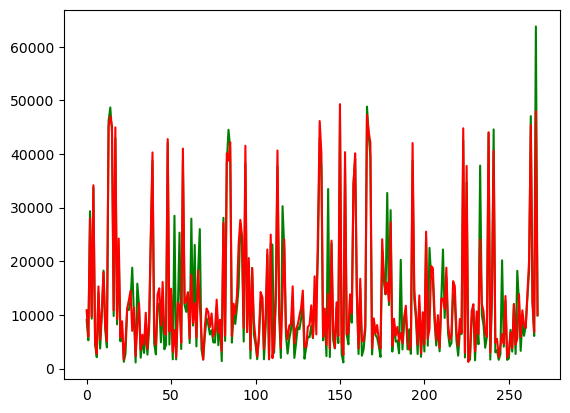

In [18]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual charges"]=Y_test
new_df["Predicted charges"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)


new_df["Actual charges"].plot(color='green')
new_df["Predicted charges"].plot(color='red')
plt.show()

